# Feature Importance

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Previous Trained Model

In [2]:
# Load the saved Random Forest model
model_folder = "../../../2_Modeling_Phase/Saved-Models/"
model_filename = "Farm-Flow_XGBoost.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

Load Train Dataset

In [3]:
df_train = pd.read_csv("../../../0_Datasets/Farm-Flow/train.csv")

Load Test Dataset

In [4]:
df_test = pd.read_csv("../../../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,Port_Scanning,1
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,MQTT_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,Normal,0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,Normal,0


In [6]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.672105,-0.457813,-0.577140,-0.443123,-0.276940,-0.267571,-0.272742,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,-0.277181,-0.267813,-0.272983,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
2,-0.454205,-0.457813,-0.577140,-0.443123,-0.276909,-0.268058,-0.272969,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276907,-0.267537,-0.272708,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.454205,-0.253238,-0.004560,-0.443123,-0.276892,-0.267522,-0.272693,0.728588,-0.241889,1.129475,...,-0.477522,-0.635539,-0.408378,-0.455263,-0.329944,-0.199849,-0.596727,-0.418623,HTTP_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,1.942696,2.201655,2.285759,2.444445,-0.277003,-0.267561,-0.272768,0.891878,1.727690,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.691239,0.897993,0.262007,1.154806,Arp_Spoofing,1
15779,2.160596,2.201655,2.285759,2.444445,-0.276991,-0.267622,-0.272793,0.728588,1.928668,-0.147053,...,-0.240860,1.678331,-0.072901,-0.267431,2.393212,2.434972,1.265201,2.728235,Normal,0
15780,-0.236304,-0.662387,-0.577140,-0.443123,-0.277906,-0.268577,-0.273730,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
15781,-0.454205,-0.662387,-0.577140,-0.443123,-0.277687,-0.268577,-0.273620,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1


-----
## Train and Test Datasets

Drop Multiclass Column

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [8]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [9]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [10]:
y = df_train["is_attack"].values

Split into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred)
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---

## XGBoost

In [18]:
import xgboost as xgb

feature_importance = model.feature_importances_

normalized_importance = feature_importance * 100

normalized_importance

array([ 2.477072  ,  0.22866903, 10.068465  ,  0.22533017,  0.900106  ,
        0.655803  ,  0.19677775,  4.8743625 ,  0.13913311,  0.16399473,
        1.4580035 ,  0.18943372,  3.6494334 ,  1.2943339 ,  0.15490216,
        0.81936336,  1.4063946 ,  0.11275151,  0.39571914,  0.        ,
        0.5769673 ,  0.12902984,  0.20254156,  0.49924845,  0.        ,
        1.2796761 ,  0.19289215,  0.20393296,  0.212645  , 66.82904   ,
        0.137302  ,  0.20484126,  0.12183601], dtype=float32)

## Imodels

In [19]:
import imodels
from imodels import FIGSClassifier

#model_figs = FIGSClassifier(max_rules=7, max_trees=3)
#model_figs.fit(X_test_labeled, y_test_target_series, feature_names=feature_names)

dfp_importance = pd.DataFrame({'feat_names': feature_names})
dfp_importance['feature'] = dfp_importance.index
dfp_importance_gini = pd.DataFrame({'importance_gini': model.feature_importances_})
dfp_importance_gini['feature'] = dfp_importance_gini.index
dfp_importance_gini['importance_gini_pct'] = dfp_importance_gini['importance_gini'].rank(pct=True)
dfp_importance = pd.merge(dfp_importance, dfp_importance_gini, on='feature', how='left')
dfp_importance = dfp_importance.sort_values(by=['importance_gini', 'feature'], ascending=[False, True]).reset_index(drop=True)
display(dfp_importance)

,feat_names,feature,importance_gini,importance_gini_pct
0,fwd_subflow_pkts,29,0.668290,1.000000
1,fwd_data_pkts_tot,2,0.100685,0.969697
2,down_up_ratio,7,0.048744,0.939394
3,bwd_header_size_min,12,0.036494,0.909091
4,fwd_pkts_tot,0,0.024771,0.878788
5,fwd_header_size_max,10,0.014580,0.848485
6,fwd_pkts_payload.tot,16,0.014064,0.818182
7,bwd_header_size_max,13,0.012943,0.787879
8,flow_pkts_payload.max,25,0.012797,0.757576
9,fwd_pkts_per_sec,4,0.009001,0.727273


## Shap

/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


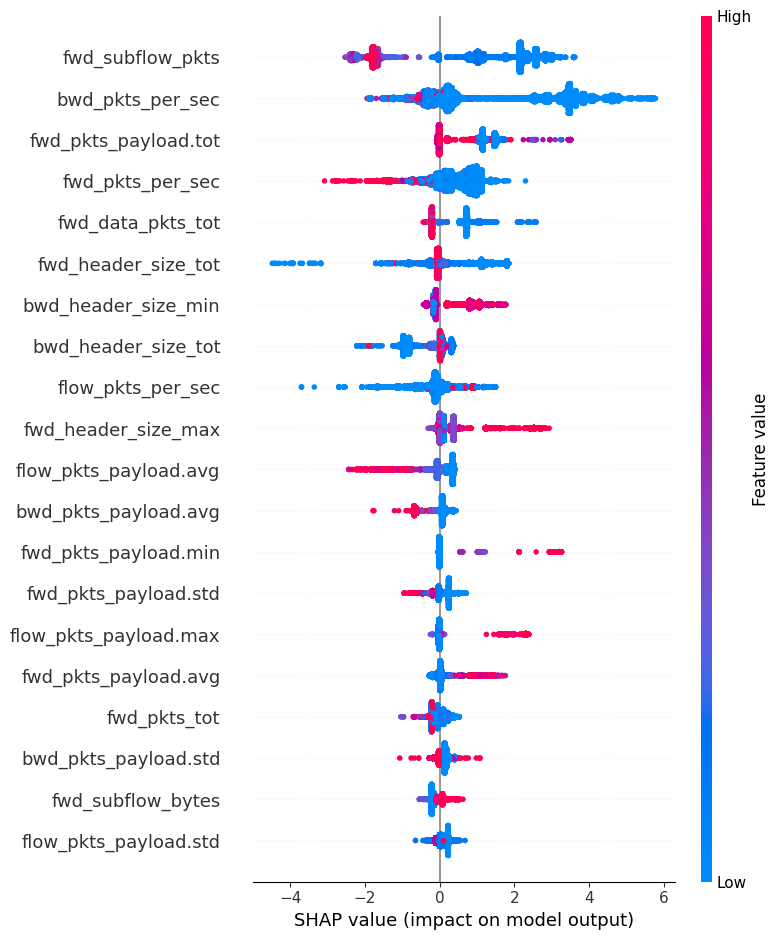

In [20]:
import shap

#explainer = shap.Explainer(model)
#explainer = shap.KernelExplainer(model)
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test_labeled)

shap.summary_plot(shap_values, X_test_labeled,feature_names=feature_names,class_names=class_names)

## Shapash

## InterpretML

In [21]:
from interpret.blackbox import MorrisSensitivity
from sklearn.pipeline import Pipeline
from interpret import show

msa = MorrisSensitivity(model, X_test_labeled,feature_names=feature_names)

show(msa.explain_global())

/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/dash/_jupyter.py:28: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


<!-- http://127.0.0.1:7239/136642257618128/ -->

## LOFO

In [22]:
feature_names

['fwd_pkts_tot',
 'bwd_pkts_tot',
 'fwd_data_pkts_tot',
 'bwd_data_pkts_tot',
 'fwd_pkts_per_sec',
 'bwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'down_up_ratio',
 'fwd_header_size_tot',
 'fwd_header_size_min',
 'fwd_header_size_max',
 'bwd_header_size_tot',
 'bwd_header_size_min',
 'bwd_header_size_max',
 'fwd_pkts_payload.min',
 'fwd_pkts_payload.max',
 'fwd_pkts_payload.tot',
 'fwd_pkts_payload.avg',
 'fwd_pkts_payload.std',
 'bwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'bwd_pkts_payload.avg',
 'bwd_pkts_payload.std',
 'flow_pkts_payload.min',
 'flow_pkts_payload.max',
 'flow_pkts_payload.tot',
 'flow_pkts_payload.avg',
 'flow_pkts_payload.std',
 'fwd_subflow_pkts',
 'bwd_subflow_pkts',
 'fwd_subflow_bytes',
 'bwd_subflow_bytes']

In [23]:
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold

target_name = "is_attack"

column_names = feature_names + [target_name]

combined_data = np.column_stack((X_test_labeled, y_test_target_series))
combined_df = pd.DataFrame(combined_data, columns=column_names)

# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

# define the binary target and the features
dataset = Dataset(df=combined_df, target="is_attack", features=[col for col in combined_df.columns if col != "is_attack"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance = lofo_imp.get_importance()

importance

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3249
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/tqdm/std.py:465: DeprecationWarning:

datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).

  0%|                                                                                                                            | 0/33 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3230
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


  3%|███▌                                                                                                                | 1/33 [00:00<00:09,  3.45it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3203
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

  6%|███████                                                                                                             | 2/33 [00:00<00:08,  3.53it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3249
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


  9%|██████████▌                                                                                                         | 3/33 [00:00<00:08,  3.63it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3189
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3218
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 12%|██████████████                                                                                                      | 4/33 [00:01<00:07,  3.68it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3188
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3219
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 15%|█████████████████▌                                                                                                  | 5/33 [00:01<00:07,  3.75it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2994
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Inf

 18%|█████████████████████                                                                                               | 6/33 [00:01<00:07,  3.72it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2967
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843


 21%|████████████████████████▌                                                                                           | 7/33 [00:01<00:06,  3.75it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3208
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Info] Numb

 24%|████████████████████████████                                                                                        | 8/33 [00:02<00:06,  3.75it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2977
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3008
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 27%|███████████████████████████████▋                                                                                    | 9/33 [00:02<00:06,  3.80it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3202
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3235
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 30%|██████████████████████████████████▊                                                                                | 10/33 [00:02<00:05,  3.84it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3012
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 33%|██████████████████████████████████████▎                                                                            | 11/33 [00:02<00:05,  3.83it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2997
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Info] Numb

 36%|█████████████████████████████████████████▊                                                                         | 12/33 [00:03<00:05,  3.75it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2973
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843


 39%|█████████████████████████████████████████████▎                                                                     | 13/33 [00:03<00:05,  3.74it/s]

[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3164
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3202
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Numb

 42%|████████████████████████████████████████████████▊                                                                  | 14/33 [00:03<00:05,  3.76it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3242
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 45%|████████████████████████████████████████████████████▎                                                              | 15/33 [00:04<00:04,  3.78it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2979
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3010
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 48%|███████████████████████████████████████████████████████▊                                                           | 16/33 [00:04<00:04,  3.69it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2986
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 52%|███████████████████████████████████████████████████████████▏                                                       | 17/33 [00:04<00:04,  3.62it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3208
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Info] Numb

 55%|██████████████████████████████████████████████████████████████▋                                                    | 18/33 [00:04<00:04,  3.67it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3113
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3141
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 58%|██████████████████████████████████████████████████████████████████▏                                                | 19/33 [00:05<00:03,  3.74it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3222
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 61%|█████████████████████████████████████████████████████████████████████▋                                             | 20/33 [00:05<00:03,  3.78it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2988
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3019
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 21/33 [00:05<00:03,  3.81it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2994
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 22/33 [00:05<00:02,  3.83it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3249
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 70%|████████████████████████████████████████████████████████████████████████████████▏                                  | 23/33 [00:06<00:02,  3.85it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3173
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3207
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Info] Numb

 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 24/33 [00:06<00:02,  3.81it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3179
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info

 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 25/33 [00:06<00:02,  3.84it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3202
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3235
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 79%|██████████████████████████████████████████████████████████████████████████████████████████▌                        | 26/33 [00:06<00:01,  3.85it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3207
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3240
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 27/33 [00:07<00:01,  3.83it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2988
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3018
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Info] Numb

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 28/33 [00:07<00:01,  3.70it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2992
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3208
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████              | 29/33 [00:07<00:01,  3.67it/s]

[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3173
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3214
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Numb

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 30/33 [00:08<00:00,  3.71it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3180
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3214
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 31/33 [00:08<00:00,  3.77it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3111
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3138
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 32/33 [00:08<00:00,  3.73it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2975
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3012
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:08<00:00,  3.75it/s]


,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
28,fwd_header_size_max,0.000743,0.000533,0.000500,0.000347,0.000464,0.001662
14,bwd_header_size_max,0.000698,0.000410,0.000440,0.000518,0.000428,0.001405
9,fwd_data_pkts_tot,0.000661,0.000406,0.000461,0.000300,0.000533,0.001349
10,flow_pkts_payload.tot,0.000635,0.000366,0.000467,0.000392,0.000414,0.001268
26,bwd_pkts_payload.max,0.000581,0.000394,0.000336,0.000178,0.000597,0.001213
16,bwd_pkts_tot,0.000552,0.000280,0.000387,0.000306,0.000492,0.001022
24,fwd_pkts_per_sec,0.000503,0.000965,-0.000301,-0.000583,0.001211,0.001687
11,flow_pkts_payload.std,0.000494,0.000130,0.000331,0.000438,0.000520,0.000687
32,fwd_subflow_bytes,0.000487,0.000112,0.000620,0.000312,0.000485,0.000533
15,fwd_pkts_payload.tot,0.000485,0.000389,0.000459,-0.000141,0.000793,0.000828


## Explainer Dashboard

In [24]:
import re
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

def clean_feature_name(feature_name):
    cleaned_name = re.sub(r'[^a-zA-Z0-9_]', '_', feature_name)
    return cleaned_name

cleaned_feature_names = [clean_feature_name(feature) for feature in X_test_labeled.columns]

X_test_labeled.columns = cleaned_feature_names
y_test_target_series.columns = cleaned_feature_names

explainer = ClassifierExplainer(model, X_test_labeled, y_test_target_series)

ExplainerDashboard(explainer).run()

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/jupyter_dash/comms.py:10: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.


Building ExplainerDashboard..


/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/explainerdashboard/dashboards.py:649: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html


Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...


/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('ruamel')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('zope')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('zope')`.
Implementing implicit namespace packages (as specif

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Generating xgboost model dump...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.20.228.103:8050


127.0.0.1 - - [18/Mar/2024 10:48:10] code 400, message Bad request version ('\x07\x84ýéA\x10\x7fÉv\x15¼\x10ð\x13N.\x04À\x8cS#~l\x9a§\x00"\x13\x01\x13\x03\x13\x02À+À/Ì©Ì¨À,À0À')
[2024-03-18 10:48:56,448] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/flask/app.py", line 1463, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/flask/app.py", line 872, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/flask/app.py", line 870, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/flask/app.py", line 855, in dispatch_request
    return se

------
## Notes

- SHAP, Shapash, and Explainer Dashboard: all give the same results since all of them are based on the SHAP equation to calculate the feature importance
- Explainer Dashboard has SHAP Values and Permutation Importance, but not Morris Sensitivity

**SHAP Values vs Permutation Importance vs Morris Sensitivity vs LOFO (Leave One Feature Out)**

1. **SHAP Values:**
- **Concept:** SHAP values are based on cooperative game theory and aim to fairly distribute the contribution of each feature to the model's prediction.
- **How it works:** It calculates the average contribution of each feature across all possible feature combinations and assigns a value to each feature, indicating its impact on the prediction.
- **Interpretation:** A positive SHAP value for a feature contributes to increasing the model's output, while a negative value indicates a contribution to decreasing the output.

2. **Permutation Importance:**
- **Concept:** Permutation Importance assesses the importance of each feature by permuting (randomly shuffling) its values and observing the change in the model's performance.
- **How it works:** It measures the decrease in model performance (e.g., accuracy) when the values of a specific feature are randomly permuted, and the larger the decrease, the more important the feature is considered.
- **Interpretation:** A higher decrease in performance suggests that the feature is crucial for the model's predictions.

3. **Morris Sensitivity:**
- **Concept:** Morris Sensitivity is a global sensitivity analysis method that assesses the impact of small variations in individual features on the model's output.
- **How it works:** It involves perturbing one feature at a time while keeping other features constant, observing how the output changes, and quantifying the sensitivity of the model to each feature.
- **Interpretation:** A higher Morris Sensitivity value indicates a greater impact of the feature on the model output.

4. **LOFO (Leave One Feature Out):**
- **Concept:** LOFO evaluates the impact of leaving out each feature one at a time on the model's performance.
- **How it works:** It systematically removes each feature, re-trains the model, and measures the change in performance metrics (e.g., accuracy, AUC) to understand the importance of each feature.
- **Interpretation:** A larger decrease in performance when a specific feature is left out suggests that the feature is more critical for the model's predictions.

**Assumptions:**
- **SHAP Values:** Assumes that features interact cooperatively.
- **Permutation Importance:** Assumes that the change in model performance is solely due to the importance of the feature.
- **Morris Sensitivity:** Assumes small variations in individual features.
- **LOFO:** Assumes that leaving out a feature impacts the model's performance.

**In cybersecurity:**

Given the nature of the dataset, the most important feature is related to sent packages and the time it takes for them to be sent. Since the dataset was created using IoT devices, packages and timing will be recursive with minor changes.

- **Fwd/Bwd Packet Features:** They represent the total number of forward and backward packets.
- **Packet Timing Features:** Provide insights into the packet transmission rate.
- **Payload Size Features:** The payload size features, especially if IoT devices consistently send the same type of data.
- **Subflow Features:** Features related to subflows, capture patterns specific to IoT communication.